<a href="https://colab.research.google.com/github/pdesai27/DAB-103/blob/main/CountryMigration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Country Migration

### Import packages

In [32]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading and exploring data

In [33]:
# Load country migration data
df = pd.read_csv("https://raw.githubusercontent.com/pdesai27/DAB-103/main/Data/CSV_%20Country%20Migration.csv")

In [34]:
# Use head to display first five rows
df.head(5)

,base_country_code,base_country_name,base_lat,base_long,base_country_wb_income,base_country_wb_region,target_country_code,target_country_name,target_lat,target_long,target_country_wb_income,target_country_wb_region,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,ae,United Arab Emirates,23.424076,53.847818,High Income,Middle East & North Africa,af,Afghanistan,33.939110,67.709953,Low Income,South Asia,0.19,0.16,0.11,-0.05,-0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ae,United Arab Emirates,23.424076,53.847818,High Income,Middle East & North Africa,dz,Algeria,28.033886,1.659626,Upper Middle Income,Middle East & North Africa,0.19,0.25,0.57,0.55,0.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ae,United Arab Emirates,23.424076,53.847818,High Income,Middle East & North Africa,ao,Angola,-11.202692,17.873887,Lower Middle Income,Sub-Saharan Africa,-0.01,0.04,0.11,-0.02,-0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ae,United Arab Emirates,23.424076,53.847818,High Income,Middle East & North Africa,ar,Argentina,-38.416097,-63.616672,High Income,Latin America & Caribbean,0.16,0.18,0.04,0.01,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ae,United Arab Emirates,23.424076,53.847818,High Income,Middle East & North Africa,am,Armenia,40.069099,45.038189,Upper Middle Income,Europe & Central Asia,0.10,0.05,0.03,-0.01,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# Use tail to display last five rows
df.tail(5)

,base_country_code,base_country_name,base_lat,base_long,base_country_wb_income,base_country_wb_region,target_country_code,target_country_name,target_lat,target_long,target_country_wb_income,target_country_wb_region,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
4143,zw,Zimbabwe,-19.015438,29.154857,Low Income,Sub-Saharan Africa,za,South Africa,-30.559482,22.937506,Upper Middle Income,Sub-Saharan Africa,-2.98,-11.79,-9.10,-12.08,-20.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4144,zw,Zimbabwe,-19.015438,29.154857,Low Income,Sub-Saharan Africa,ae,United Arab Emirates,23.424076,53.847818,High Income,Middle East & North Africa,-2.50,-2.49,-2.21,-1.68,-3.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4145,zw,Zimbabwe,-19.015438,29.154857,Low Income,Sub-Saharan Africa,gb,United Kingdom,55.378051,-3.435973,High Income,Europe & Central Asia,3.91,4.66,0.74,-0.66,-1.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4146,zw,Zimbabwe,-19.015438,29.154857,Low Income,Sub-Saharan Africa,us,United States,37.090240,-95.712891,High Income,North America,38.60,37.76,10.09,6.06,5.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4147,zw,Zimbabwe,-19.015438,29.154857,Low Income,Sub-Saharan Africa,zm,Zambia,-13.133897,27.849332,Lower Middle Income,Sub-Saharan Africa,0.70,2.47,0.83,1.21,0.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# Show details
df.describe(include='all')

,base_country_code,base_country_name,base_lat,base_long,base_country_wb_income,base_country_wb_region,target_country_code,target_country_name,target_lat,target_long,target_country_wb_income,target_country_wb_region,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
count,4148,4148,4148.000000,4148.000000,4148,4148,4148,4148,4148.000000,4148.000000,4148,4148,4148.000000,4148.000000,4148.000000,4148.000000,4148.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
unique,140,140,NaN,NaN,4,7,140,140,NaN,NaN,4,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,us,United States,NaN,NaN,High Income,Europe & Central Asia,us,United States,NaN,NaN,High Income,Europe & Central Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,139,139,NaN,NaN,2415,1696,139,139,NaN,NaN,2415,1696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,28.418022,21.698305,NaN,NaN,NaN,NaN,28.418022,21.698305,NaN,NaN,0.461757,0.150248,-0.080272,-0.040591,-0.022743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,25.086012,61.937381,NaN,NaN,NaN,NaN,25.086012,61.937381,NaN,NaN,5.006530,4.201118,3.203092,3.593876,3.633247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,-40.900557,-106.346771,NaN,NaN,NaN,NaN,-40.900557,-106.346771,NaN,NaN,-37.010000,-40.890000,-43.660000,-56.220000,-50.330000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,14.058324,-3.435973,NaN,NaN,NaN,NaN,14.058324,-3.435973,NaN,NaN,-0.150000,-0.190000,-0.210000,-0.210000,-0.210000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,35.861660,19.145136,NaN,NaN,NaN,NaN,35.861660,19.145136,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,47.516231,53.688046,NaN,NaN,NaN,NaN,47.516231,53.688046,NaN,NaN,0.240000,0.220000,0.160000,0.170000,0.180000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# Checking the missing values
df.isnull().sum()

base_country_code              0
base_country_name              0
base_lat                       0
base_long                      0
base_country_wb_income         0
base_country_wb_region         0
target_country_code            0
target_country_name            0
target_lat                     0
target_long                    0
target_country_wb_income       0
target_country_wb_region       0
net_per_10K_2015               0
net_per_10K_2016               0
net_per_10K_2017               0
net_per_10K_2018               0
net_per_10K_2019               0
Unnamed: 17                 4148
Unnamed: 18                 4148
Unnamed: 19                 4148
Unnamed: 20                 4148
Unnamed: 21                 4148
Unnamed: 22                 4148
Unnamed: 23                 4148
Unnamed: 24                 4148
Unnamed: 25                 4148
dtype: int64

In [38]:
# Checking the shape of data
df.shape

(4148, 26)

In [39]:
# Checking the data types
df.dtypes

base_country_code            object
base_country_name            object
base_lat                    float64
base_long                   float64
base_country_wb_income       object
base_country_wb_region       object
target_country_code          object
target_country_name          object
target_lat                  float64
target_long                 float64
target_country_wb_income     object
target_country_wb_region     object
net_per_10K_2015            float64
net_per_10K_2016            float64
net_per_10K_2017            float64
net_per_10K_2018            float64
net_per_10K_2019            float64
Unnamed: 17                 float64
Unnamed: 18                 float64
Unnamed: 19                 float64
Unnamed: 20                 float64
Unnamed: 21                 float64
Unnamed: 22                 float64
Unnamed: 23                 float64
Unnamed: 24                 float64
Unnamed: 25                 float64
dtype: object

In [40]:
# Extract column names
df.columns

Index(['base_country_code', 'base_country_name', 'base_lat', 'base_long',
       'base_country_wb_income', 'base_country_wb_region',
       'target_country_code', 'target_country_name', 'target_lat',
       'target_long', 'target_country_wb_income', 'target_country_wb_region',
       'net_per_10K_2015', 'net_per_10K_2016', 'net_per_10K_2017',
       'net_per_10K_2018', 'net_per_10K_2019', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

### Cleaning dataset

In [41]:
# Select columns 1 to 17 and drop empty columns (18 to 26).
data = df.iloc[:,0:17].sort_values(by='base_country_wb_region')

# Use head to display first ten rows
data.head(10)

,base_country_code,base_country_name,base_lat,base_long,base_country_wb_income,base_country_wb_region,target_country_code,target_country_name,target_lat,target_long,target_country_wb_income,target_country_wb_region,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
2950,nz,New Zealand,-40.900557,174.885971,High Income,East Asia & Pacific,be,Belgium,50.503887,4.469936,High Income,Europe & Central Asia,0.13,0.10,0.07,0.07,-0.05
3609,th,Thailand,15.870032,100.992541,Upper Middle Income,East Asia & Pacific,au,Australia,-25.274398,133.775136,High Income,East Asia & Pacific,-0.83,-1.20,-1.33,-0.37,-0.86
2333,kr,"Korea, Rep.",35.907757,127.766922,High Income,East Asia & Pacific,br,Brazil,-14.235004,-51.925280,Upper Middle Income,Latin America & Caribbean,-0.07,0.01,0.19,1.37,0.96
2332,kr,"Korea, Rep.",35.907757,127.766922,High Income,East Asia & Pacific,be,Belgium,50.503887,4.469936,High Income,Europe & Central Asia,0.09,-0.05,-0.02,0.04,-0.02
2331,kr,"Korea, Rep.",35.907757,127.766922,High Income,East Asia & Pacific,bd,Bangladesh,23.684994,90.356331,Lower Middle Income,South Asia,0.12,0.10,0.16,0.23,0.23
2330,kr,"Korea, Rep.",35.907757,127.766922,High Income,East Asia & Pacific,au,Australia,-25.274398,133.775136,High Income,East Asia & Pacific,-0.46,-0.64,-0.96,-0.41,-0.09
2329,kh,Cambodia,12.565679,104.990963,Lower Middle Income,East Asia & Pacific,vn,Vietnam,14.058324,108.277199,Lower Middle Income,East Asia & Pacific,8.43,8.87,6.38,4.82,3.54
2328,kh,Cambodia,12.565679,104.990963,Lower Middle Income,East Asia & Pacific,us,United States,37.090240,-95.712891,High Income,North America,14.99,3.50,-1.56,-1.78,-1.26
2327,kh,Cambodia,12.565679,104.990963,Lower Middle Income,East Asia & Pacific,gb,United Kingdom,55.378051,-3.435973,High Income,Europe & Central Asia,0.16,0.58,-1.37,-0.96,-0.26
2326,kh,Cambodia,12.565679,104.990963,Lower Middle Income,East Asia & Pacific,th,Thailand,15.870032,100.992541,Upper Middle Income,East Asia & Pacific,1.81,3.32,1.94,2.01,1.46


In [42]:
# Use tail to display last ten rows
data.tail(10)

,base_country_code,base_country_name,base_lat,base_long,base_country_wb_income,base_country_wb_region,target_country_code,target_country_name,target_lat,target_long,target_country_wb_income,target_country_wb_region,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
694,cd,"Congo, Dem. Rep.",-4.038333,21.758664,Low Income,Sub-Saharan Africa,ug,Uganda,1.373333,32.290275,Low Income,Sub-Saharan Africa,1.40,2.13,0.68,1.51,1.57
773,ci,Cote d'Ivoire,7.539989,-5.547080,Lower Middle Income,Sub-Saharan Africa,gh,Ghana,7.946527,-1.023194,Lower Middle Income,Sub-Saharan Africa,1.58,1.68,0.92,0.92,0.86
771,ci,Cote d'Ivoire,7.539989,-5.547080,Lower Middle Income,Sub-Saharan Africa,ca,Canada,56.130366,-106.346771,High Income,North America,-1.40,-3.08,-3.14,-3.31,-3.58
770,ci,Cote d'Ivoire,7.539989,-5.547080,Lower Middle Income,Sub-Saharan Africa,cm,Cameroon,7.369722,12.354722,Lower Middle Income,Sub-Saharan Africa,0.55,0.76,0.60,0.90,0.64
769,ci,Cote d'Ivoire,7.539989,-5.547080,Lower Middle Income,Sub-Saharan Africa,bf,Burkina Faso,12.238333,-1.561593,Low Income,Sub-Saharan Africa,0.44,0.74,0.98,0.39,0.66
768,ci,Cote d'Ivoire,7.539989,-5.547080,Lower Middle Income,Sub-Saharan Africa,bj,Benin,9.307690,2.315834,Low Income,Sub-Saharan Africa,0.85,0.83,0.14,0.97,0.80
767,ci,Cote d'Ivoire,7.539989,-5.547080,Lower Middle Income,Sub-Saharan Africa,be,Belgium,50.503887,4.469936,High Income,Europe & Central Asia,-0.20,-0.33,-0.28,-0.14,-0.99
696,cd,"Congo, Dem. Rep.",-4.038333,21.758664,Low Income,Sub-Saharan Africa,us,United States,37.090240,-95.712891,High Income,North America,34.27,16.63,4.66,2.51,2.13
772,ci,Cote d'Ivoire,7.539989,-5.547080,Lower Middle Income,Sub-Saharan Africa,fr,France,46.227638,2.213749,High Income,Europe & Central Asia,-11.11,-12.24,-18.46,-15.47,-21.54
4147,zw,Zimbabwe,-19.015438,29.154857,Low Income,Sub-Saharan Africa,zm,Zambia,-13.133897,27.849332,Lower Middle Income,Sub-Saharan Africa,0.70,2.47,0.83,1.21,0.33


In [43]:
# Checking the shape of data
data.shape

(4148, 17)

In [44]:
# Checking the missing values
data.isnull().sum()

base_country_code           0
base_country_name           0
base_lat                    0
base_long                   0
base_country_wb_income      0
base_country_wb_region      0
target_country_code         0
target_country_name         0
target_lat                  0
target_long                 0
target_country_wb_income    0
target_country_wb_region    0
net_per_10K_2015            0
net_per_10K_2016            0
net_per_10K_2017            0
net_per_10K_2018            0
net_per_10K_2019            0
dtype: int64

In [45]:
# Check unique values
data.nunique()

base_country_code           140
base_country_name           140
base_lat                    140
base_long                   140
base_country_wb_income        4
base_country_wb_region        7
target_country_code         140
target_country_name         140
target_lat                  140
target_long                 140
target_country_wb_income      4
target_country_wb_region      7
net_per_10K_2015            815
net_per_10K_2016            782
net_per_10K_2017            717
net_per_10K_2018            750
net_per_10K_2019            751
dtype: int64

### Preliminary visualization

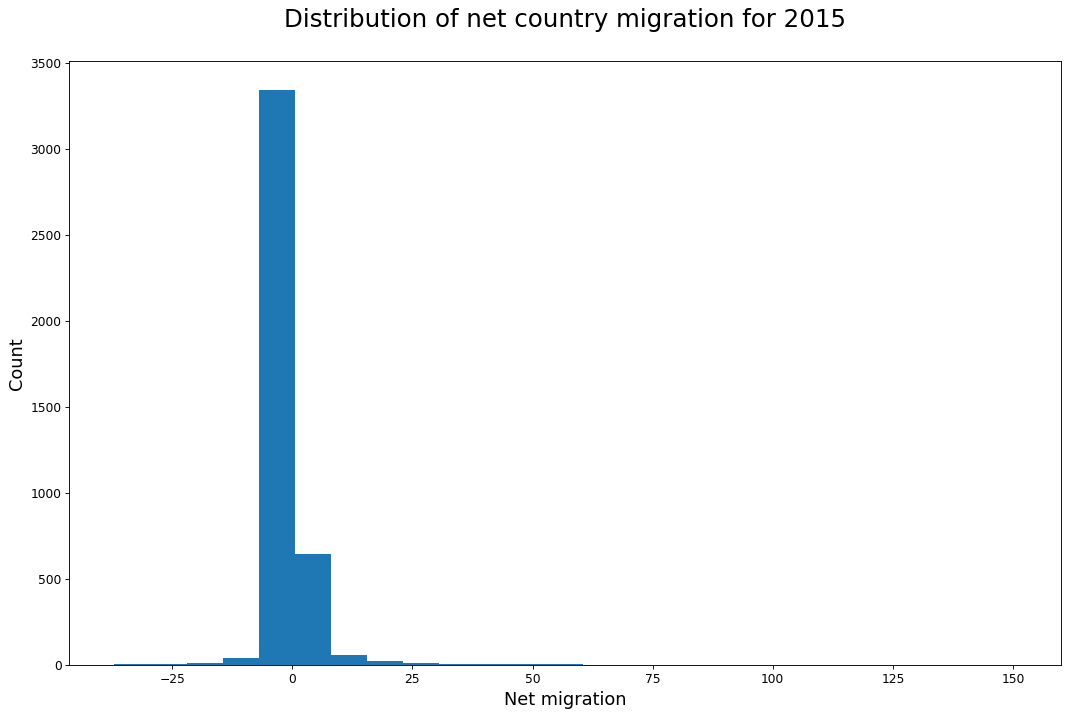

In [46]:
# Distribution of net country migration for 2015
plt.figure(figsize=(16,10), dpi= 80)
plt.hist(x='net_per_10K_2015', data=data, bins=25)

# Decoration
plt.title('Distribution of net country migration for 2015\n', fontsize=22)
plt.xlabel('Net migration', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.xticks(fontsize= 11)
plt.yticks(fontsize= 11)
plt.show()

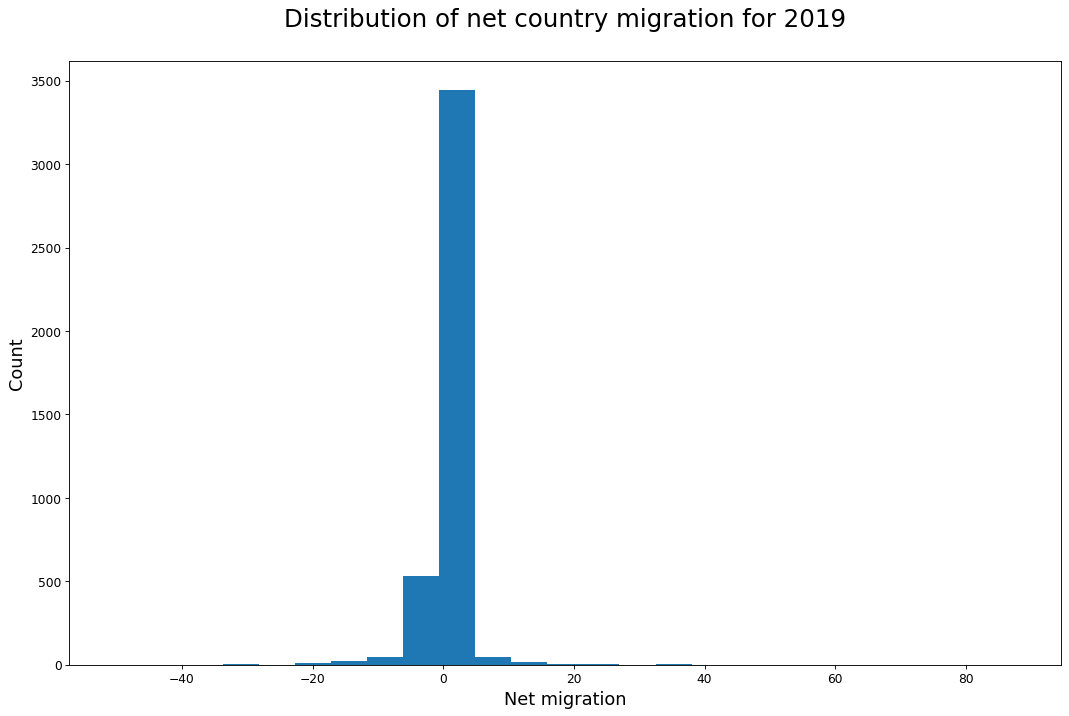

In [47]:
# Distribution of net country migration for 2019
plt.figure(figsize=(16,10), dpi= 80)
plt.hist(x='net_per_10K_2019', data=data, bins=25)

# Decoration
plt.title('Distribution of net country migration for 2019\n', fontsize=22)
plt.xlabel('Net migration', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.xticks(fontsize= 11)
plt.yticks(fontsize= 11)
plt.show()

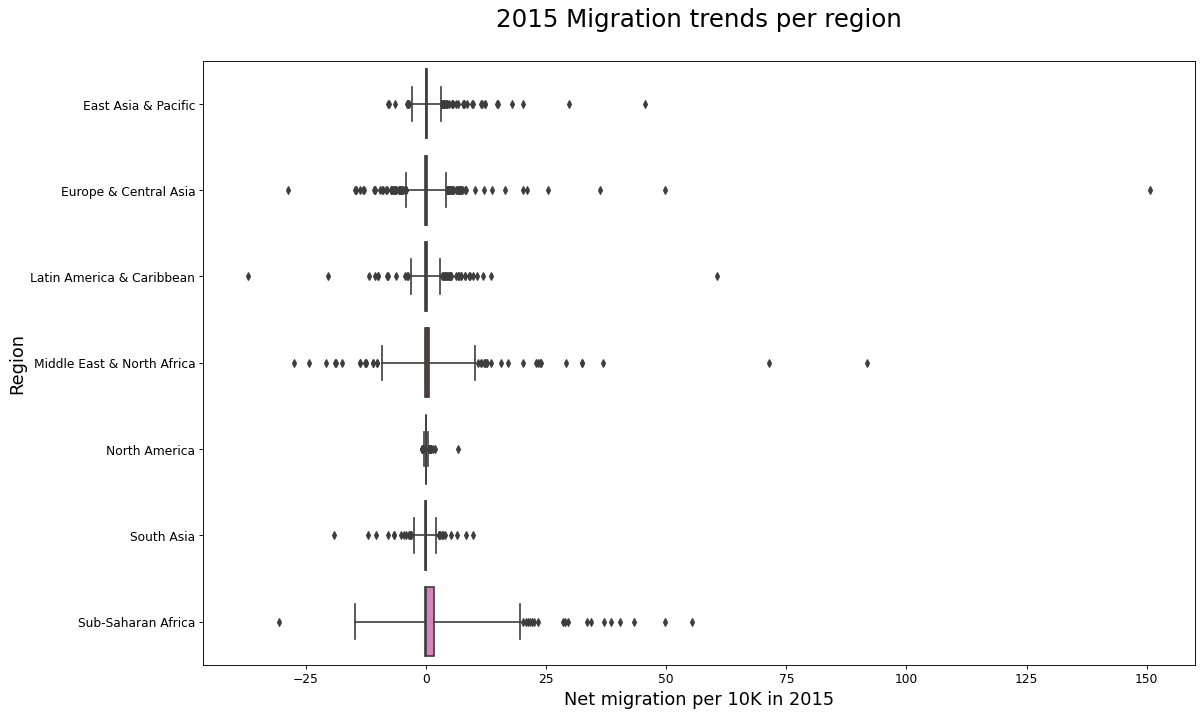

In [48]:
# Search for outliers using boxplot
plt.figure(figsize=(16,10), dpi= 80)
sns.boxplot(y = 'base_country_wb_region', x = 'net_per_10K_2015', data = data, whis=10)

# Decoration
plt.title('2015 Migration trends per region\n', fontsize=22)
plt.xlabel('Net migration per 10K in 2015', fontsize = 16)
plt.ylabel('Region', fontsize = 16)
plt.xticks(fontsize= 11)
plt.yticks(fontsize= 11)
plt.show()

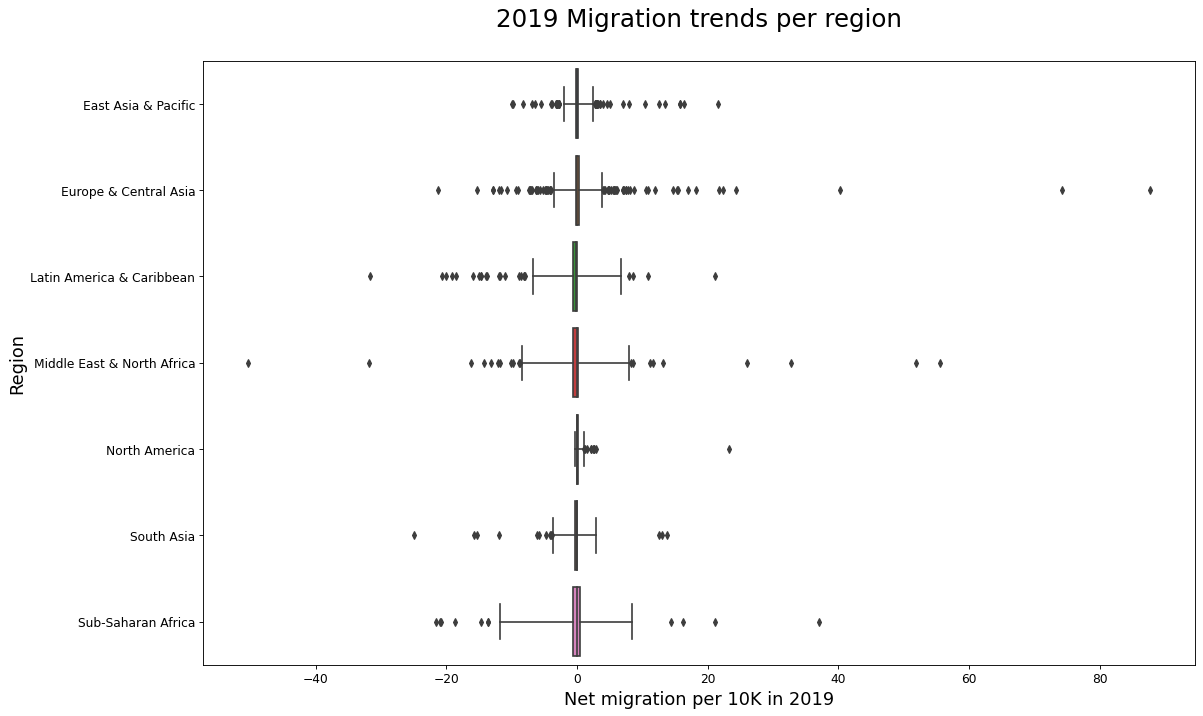

In [49]:
# Search for outliers using boxplot
plt.figure(figsize=(16,10), dpi= 80)
sns.boxplot(y = 'base_country_wb_region', x = 'net_per_10K_2019', data = data, whis=10)

# Decoration
plt.title('2019 Migration trends per region\n', fontsize=22)
plt.xlabel('Net migration per 10K in 2019', fontsize = 16)
plt.ylabel('Region', fontsize = 16)
plt.xticks(fontsize= 11)
plt.yticks(fontsize= 11)
plt.show()